# Import the libraries needed:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 350
pd.options.display.max_columns = 999

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
tweets = pd.read_csv('data/update_tweets.csv')
tweets.head(3)

,date,username,name,tweet,mentions,replies_count,retweets_count,likes_count,video,quote_url,tweet_char_length,tweet_word_count,likes_success,replies_success,retweets_success
0,2020-07-14,elonmusk,Elon Musk,Cute,['teslarati'],222,176,7883,0,NaN,4,1,0,0,0
1,2020-07-14,elonmusk,Elon Musk,Wow,"['davidtayar5', 'teslalisa', 'stevehamel16', 'vincent13031925', 's_padival', 'barkmsmeagol', 'annerajb', 'pjhornak', 'wpipperger', 'ecoheliguy']",346,180,4241,0,NaN,3,1,0,0,0
2,2020-07-13,elonmusk,Elon Musk,Reusability is essential. A rocket that is single use is just as absurd as a single use airplane. F9 engines already fire 3 times per flight.,['katlinegrey'],102,126,1551,0,NaN,141,26,0,0,0


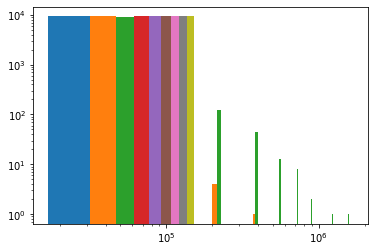

In [3]:
plt.hist(tweets.drop(columns=(['date', 'username', 'name', 'tweet', 'mentions', 'quote_url']), axis=0))
plt.xscale('log')
plt.yscale('log');

In [4]:
cv = CountVectorizer(stop_words=('english'), ngram_range=(1, 3))
tweets_cv = cv.fit_transform(tweets['tweet'])
tweet_cv_df = pd.DataFrame(tweets_cv.todense(), columns=cv.get_feature_names())
tweet_cv_df.sum(axis=0).sort_values(ascending=False).head(10)

com                1496
tesla              1030
twitter             977
twitter com         917
https               867
pic                 564
pic twitter         544
pic twitter com     544
yes                 464
just                392
dtype: int64

In [5]:
X = tweets['tweet']
y1 = tweets['retweets_success']

In [6]:
y2 = tweets['replies_success']

In [7]:
y3 = tweets['likes_success']

In [8]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1,
                                                    random_state=42,
                                                    test_size=.27)

In [9]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2,
                                                    random_state=42,
                                                    test_size=.27)

In [10]:
X_train, X_test, y_train3, y_test3 = train_test_split(X, y3,
                                                    random_state=42,
                                                    test_size=.27)

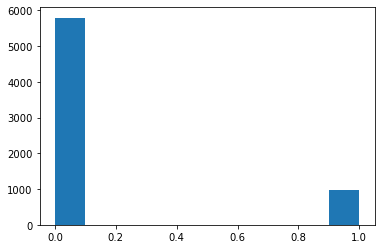

In [11]:
plt.hist(y_train1);

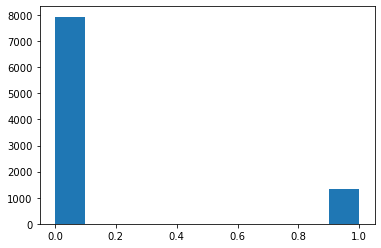

In [12]:
plt.hist(tweets['likes_success']);

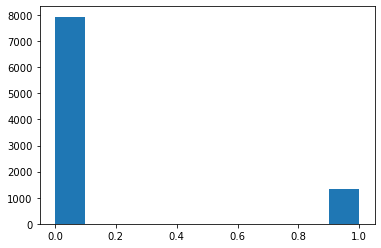

In [13]:
plt.hist(tweets['replies_success']);

In [14]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [15]:
X_train_df = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())
X_train_df.head()

,00,00 10aac3a,00 pic,00 pic twitter,000,000 000,000 000 year,000 000th,000 000th car,000 24,000 24 hours,000 caps,000 caps https,000 deaths,000 deaths tesla,000 hats,000 hats sold,000 horsepower,000 horsepower engine,000 km,000 km apogee,000 km earth,000 km falcon,000 lb,000 lb 15,000 lb towing,000 lbs,000 lbs muck,000 lbs puny,000 left,000 miles,000 miles black,000 mph,000 mph like,000 ordered,000 ordered 19,000 people,000 people died,000 people directly,000 people indirectly,000 people massive,000 people worst,000 pic,000 pic twitter,000 projects,000 projects underway,000 psi,000 road,000 road legal,000 shaft,000 shaft horsepower,000 tesla,000 tesla cars,000 tesla smart,000 tons,000 tons year,000 year,000 year age,000 year generous,0007,0007 988648,0007 988648 covid,000th,000th car,000th car pic,01,01 27,01 27 text,01 31,01 31 automakers,01 artificial,01 artificial intelligence,01 coming,01 coming soon,01 expensive,01 expensive build,01 fashion,01 fashion elon,01 secs,01 secs traction,01 weeks,01 weeks dec,0130,0130 c6ee,0130 c6ee 723c91aeae46,02,02 04,02 04 sure,02 10,02 10 tesla,02 11,02 11 consumer,02 20,02 20 tesla,02 27,02 27 bridgewater,02 27 spacex,02 ai,02 ai god,02 autos,02 autos tesla,02 elon,02 elon musk,02 spacex,02 spacex fly,02 tesla,02 tesla earnings,0202,0202 story,0202 story html,02b2ooly,03,03 18,03 18 opinion,03 18 tesla,03 25,03 25 car,03 tesla,03 tesla model,0387955011,0387955011 http,0387955011 http io9,04,04 05,04 05 feds,04 11,04 11 tesla,04 12,04 13,04 13 ftag,04 14,04 14 mystery,04 20,04 20 ford,04 22,04 22 10,04 25,04 25 tesla,04 28,04 28 texas,04 consumer,04 consumer reports,04 elon,04 elon musk,04 iss,04 iss recommends,04 little,04 little government,04 short,04 short new,04 sure,04 sure looks,04 trust,04 trust computer,04727546592196,04727546592196 2c,04727546592196 2c 72,05,05 01,05 01 fashion,05 02,05 02 tesla,05 05,05 05 warren,05 06,05 06 love,05 12,05 12 18d2e740,05 18,05 18 video,05 21,05 21 fact,05 22,05 22 elon,05 23,05 23 movies,05 30,05 30 fact,05 31,05 31 elon,05 feds,05 feds raided,05 fermi,05 fermi paradox,05 india,05 india electric,05 warren,05 warren buffett,0525558616,06,06 04,06 04 elon,06 04 little,06 08,06 08 politics,06 13,06 13 tesla,06 18,06 18 tesla,06 20,06 20 science,06 22,06 22 tesla,06 29,06 29 tesla,06 fortune,06 fortune elon,06 gates,06 gates says,06 health,06 health oumuamua,06 jay,06 jay leno,06 love,06 love tesla,0606,0606 4278,0606 4278 b454,07,07 06,07 06 fortune,07 06 gates,07 07,07 07 tesla,07 10,07 10 german,07 11,07 11 tesla,07 14,07 14 european,07 28,07 28 elon,07 fossil,07 fossil fuel,07 spacex,07 spacex steamroller,07 tesla,07 tesla model,07pm8zy0xji,08,08 06,08 06 jay,08 22,08 22 tesla,08 diff,08 diff 1st,08 politics,08 politics elon,08 spacex,08 spacex colonize,09,09 09,09 09 simple,09 15,09 15 tesla,09 23,09 23 investors,09 simple,09 simple statistic,0aji,0di88eoz2c,0f0733ad841e,0f0733ad841e html,0lkwipnopb,0ujwqqpwmsy,0ujwqqpwmsy feature,0ujwqqpwmsy feature youtu,0wopde7oe1k,10,10 000,10 000 year,10 02,10 02 ai,10 02 autos,10 03,10 03 tesla,10 14,10 14 days,10 17,10 17 775,10 20,10 20 deep,10 20 overly,10 200k,10 200k angel,10 21,10 21 pge,10 article,10 article says,10 bigger,10 bigger model,10 case,10 case ch4,10 cents,10 cents brick,10 covid,10 covid 19,10 fail,10 fail redundancy,10 followers,10 followers like,10 ft,10 ft nozzle,10 ft ok,10 german,10 german beta,10 guess,10 guess post,10 hat,10 hat aficionados,10 help,10 help affected,10 higher,10 higher chance,10 higher falcon,10 hours,10 imo,10 imo good,10 impressive,10 impressive 20,10 iridium,10 iridium satellites,10 just,10 just played,10 kg,10 kink,10 kink elon,10 km,10 km 7mph,10 kn,10 kn thrust,10 latest,10 max,10 max 39,10 million,10 million minute,10 million tons,10 mins,10 orbit,10 orbit synch,10 percent,10 percent half,10 performance,10 performance penalty,10 picks,10 picks 2015,10 runs,10 runs parallel,10 satellites,10 satellites iridium,10 sec,10 sec mile,10 secs,10 secs open,10 slight

In [16]:
y_train1.value_counts(normalize=True)

0    0.854972
1    0.145028
Name: retweets_success, dtype: float64

In [17]:
y_train2.value_counts(normalize=True)

0    0.854972
1    0.145028
Name: replies_success, dtype: float64

In [18]:
y_train3.value_counts(normalize=True)

0    0.854972
1    0.145028
Name: likes_success, dtype: float64

In [19]:
y_train1.value_counts()

0    5795
1     983
Name: retweets_success, dtype: int64

In [20]:
y_train2.value_counts()

0    5795
1     983
Name: replies_success, dtype: int64

In [21]:
y_train3.value_counts()

0    5795
1     983
Name: likes_success, dtype: int64

# Time to focus on modeling, using Multinomial Naieve Bayes, and gridsearching through the best parameters

In [22]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train1)

mnb.score(X_train_cv, y_train1), mnb.score(X_test_cv, y_test1)

(0.9699026261434052, 0.868421052631579)

In [23]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train2)

mnb.score(X_train_cv, y_train2), mnb.score(X_test_cv, y_test2)

(0.9699026261434052, 0.868421052631579)

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train3)

mnb.score(X_train_cv, y_train3), mnb.score(X_test_cv, y_test3)

(0.9699026261434052, 0.868421052631579)

In [25]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params = {
    'cv__stop_words': ['english', None],
    'cv__max_features': [1000, 2000, 3000, 4000, 5000, None],
    'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
    'cv__max_df': [.90, .95, 1.0],
    'cv__ngram_range': [(1,1), (1,2), (1,3)]
}

In [26]:
pipe_retweets = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

gs_retweets = GridSearchCV(pipe_retweets,
                  pipe_params,
                  cv=3, n_jobs=-1, verbose=2)

In [27]:
pipe_replies = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

gs_replies = GridSearchCV(pipe_replies,
                  pipe_params,
                  cv=3, n_jobs=-1, verbose=2)

In [28]:
pipe_likes = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

gs_likes = GridSearchCV(pipe_likes,
                  pipe_params,
                  cv=3, n_jobs=-1, verbose=2)

In [29]:
gs_retweets.fit(X_train, y_train1)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.7min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.9, 0.95, 1.0],
                         'cv__max_features': [1000, 2000, 3000, 4000, 5000,
                                              None],
                         'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
                         'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': ['english', None]},
             verbose=2)

In [30]:
gs_retweets.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 1000,
 'cv__min_df': 100,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': 'english'}

In [31]:
gs_retweets.score(X_train, y_train1), gs_retweets.score(X_test, y_test1)

(0.8728238418412511, 0.8644338118022329)

In [32]:
gs_replies.fit(X_train, y_train2)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.9, 0.95, 1.0],
                         'cv__max_features': [1000, 2000, 3000, 4000, 5000,
                                              None],
                         'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
                         'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': ['english', None]},
             verbose=2)

In [33]:
gs_replies.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 1000,
 'cv__min_df': 100,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': 'english'}

In [34]:
gs_replies.score(X_train, y_train2), gs_replies.score(X_test, y_test2)

(0.8728238418412511, 0.8644338118022329)

In [35]:
gs_likes.fit(X_train, y_train3)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.9, 0.95, 1.0],
                         'cv__max_features': [1000, 2000, 3000, 4000, 5000,
                                              None],
                         'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
                         'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': ['english', None]},
             verbose=2)

In [36]:
gs_likes.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 1000,
 'cv__min_df': 100,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': 'english'}

In [37]:
gs_likes.score(X_train, y_train3), gs_likes.score(X_test, y_test3)

(0.8728238418412511, 0.8644338118022329)

## How do these predictions look?

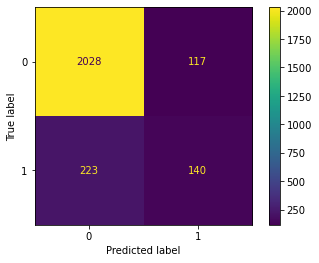

In [38]:
preds_retweets = gs_retweets.predict(X_test)
plot_confusion_matrix(gs_retweets, X_test, y_test1);

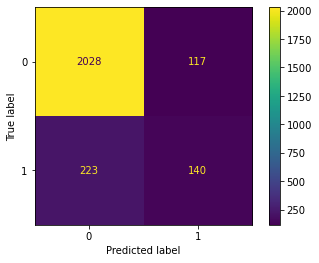

In [39]:
preds_replies = gs_replies.predict(X_test)
plot_confusion_matrix(gs_replies, X_test, y_test2);

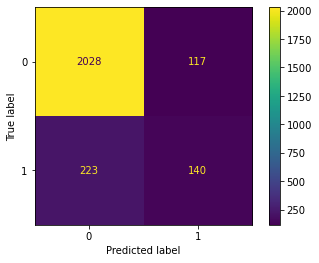

In [40]:
preds_likes = gs_likes.predict(X_test)
plot_confusion_matrix(gs_likes, X_test, y_test3);

In [41]:
print(classification_report(y_test1, preds_retweets))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2145
           1       0.54      0.39      0.45       363

    accuracy                           0.86      2508
   macro avg       0.72      0.67      0.69      2508
weighted avg       0.85      0.86      0.85      2508



In [42]:
print(classification_report(y_test2, preds_replies))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2145
           1       0.54      0.39      0.45       363

    accuracy                           0.86      2508
   macro avg       0.72      0.67      0.69      2508
weighted avg       0.85      0.86      0.85      2508



In [43]:
print(classification_report(y_test3, preds_likes))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2145
           1       0.54      0.39      0.45       363

    accuracy                           0.86      2508
   macro avg       0.72      0.67      0.69      2508
weighted avg       0.85      0.86      0.85      2508



## Let's utilize Sentiment Analysis to try ot get a better model built!

In [44]:
sia = SentimentIntensityAnalyzer()

In [45]:
scores = []

for each in tweets['tweet']:
    current_scores = sia.polarity_scores(each)
    scores.append(current_scores)

In [46]:
sentiments = pd.DataFrame(scores)
sentiments

,neg,neu,pos,compound
0,0.000,0.000,1.000,0.4588
1,0.000,0.000,1.000,0.5859
2,0.098,0.902,0.000,-0.3400
3,0.000,1.000,0.000,0.0000
4,0.135,0.608,0.257,0.4215
...,...,...,...,...
9281,0.000,0.771,0.229,0.6858
9282,0.141,0.859,0.000,-0.2023
9283,0.000,0.934,0.066,0.1779
9284,0.000,1.000,0.000,0.0000


In [47]:
tweets.head(1)

,date,username,name,tweet,mentions,replies_count,retweets_count,likes_count,video,quote_url,tweet_char_length,tweet_word_count,likes_success,replies_success,retweets_success
0,2020-07-14,elonmusk,Elon Musk,Cute,['teslarati'],222,176,7883,0,NaN,4,1,0,0,0


In [48]:
tweets_df = pd.DataFrame(tweets[['tweet', 'replies_count', 'retweets_count', 'likes_count', 'likes_success', 'replies_success', 'retweets_success']])
tweets_df.head(1)

,tweet,replies_count,retweets_count,likes_count,likes_success,replies_success,retweets_success
0,Cute,222,176,7883,0,0,0


In [49]:
tweets_sentiment = pd.concat([tweets_df, sentiments], axis=1)
tweets_sentiment.head(1)

,tweet,replies_count,retweets_count,likes_count,likes_success,replies_success,retweets_success,neg,neu,pos,compound
0,Cute,222,176,7883,0,0,0,0.0,0.0,1.0,0.4588


## What do the 50 most negative scored tweets look like?

In [50]:
tweets_sentiment.sort_values(by='compound').head(50)

,tweet,replies_count,retweets_count,likes_count,likes_success,replies_success,retweets_success,neg,neu,pos,compound
3880,"Fred, every fire *is* investigated. Problem is those who only write about 0 injury Tesla fires while ignoring fatal combustion car fires or fail to mention any contextual statistics in their article, misleading readers into thinking EV’s have high fire risk when opposite is true.",112,161,2885,0,0,0,0.403,0.552,0.045,-0.9638
5146,"We know we’ll run out of dead dinosaurs to mine for fuel & have to use sustainable energy eventually, so why not go renewable now & avoid increasing risk of climate catastrophe? Betting that science is wrong & oil companies are right is the dumbest experiment in history by far … https://twitter.com/NewsHour/status/1026599623396192256 …",2435,36013,141606,1,1,1,0.310,0.656,0.034,-0.9538
6216,"I’m not against all unions, but UAW has a track record of destroying productivity so a company can’t compete on world market. Our current factory went bankrupt under UAW before we took it over. Don’t want Tesla to die too.",30,27,460,0,0,0,0.299,0.672,0.029,-0.9493
401,(Formerly) mainstream media has systemic negative & political bias about almost everything. Reading major newspapers makes you feel sad & angry. That’s why they’re being crushed by @joerogan. Likes/retweets of old media are extremely low. Ironic article: https://www.nytimes.com/2020/05/25/opinion/joe-rogan-spotify-podcast.html …,308,2206,15066,0,0,0,0.389,0.611,0.000,-0.9475
6835,"Tesla Goes Bankrupt\nPalo Alto, California, April 1, 2018 -- Despite intense efforts to raise money, including a last-ditch mass sale of Easter Eggs, we are sad to report that Tesla has gone completely and totally bankrupt. So bankrupt, you can't believe it.",3782,21851,122206,1,1,1,0.305,0.695,0.000,-0.9454
7130,"Idiots can be very dangerous when they seem smart, but aren’t (having “PhD” in their bio is a dead giveaway), as some policymakers may get fooled. That’s what really bothered me about that human cat meme / transit “expert”.",435,1566,10016,0,0,0,0.306,0.656,0.038,-0.9335
1356,"That said, danger of panic still far exceeds danger of corona imo. If we over-allocate medical resources to corona, it will come at expense of treating other illnesses. Track graph at bottom of this page: https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html?CDC_AA_refVal= https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2F2019-ncov%2...",1600,2493,15021,0,0,0,0.287,0.713,0.000,-0.9231
206,"Extremely big difference between died because of or died with. Also, did the person actually have C19 or did they just have C19 symptoms? It’s almost impossible to die without feeling weakness, shortness of breath or other C19 symptoms, unless you were crushed by a falling piano.",278,154,1397,0,0,0,0.287,0.673,0.040,-0.9228
6578,"No, UAW does that. They want divisiveness & enforcement of 2 class “lords & commoners” system. That sucks. US fought War of Independence to get *rid* of a 2 class system! Managers & workers shd be equal w easy movement either way. Managing sucks btw. Hate doing it so much.",318,87,1046,0,0,0,0.307,0.618,0.074,-0.9215
6656,What’s actually amazing about this accident is that a Model S hit a fire truck at 60mph and the driver only broke an ankle. An impact at that speed usually results in severe injury or death.,1506,10110,80166,1,1,1,0.371,0.549,0.080,-0.9153


## How about the 50 most positive tweets?

In [51]:
tweets_sentiment.sort_values(by='compound', ascending=False).head(50)

,tweet,replies_count,retweets_count,likes_count,likes_success,replies_success,retweets_success,neg,neu,pos,compound
4234,"No, it’s cumulative, but once you win one of the prizes, referral count resets to zero & you can’t win that prize again. Intent over time is to enable those without a massive social media presence to win.",138,88,1754,0,0,0,0.029,0.539,0.432,0.9787
5474,"Wow, thanks for offering to help! The coming week is incredibly intense. If any current Tesla owners who’d like to help educate new owners could head to Tesla delivery centers during midday on Sat/Sun & morning/evening on weekdays, that would be super appreciated!",345,336,2773,0,0,0,0.000,0.586,0.414,0.9719
4625,Super appreciate Deepak’s 11 year history building Tesla & wish him greatest of happiness in retirement! Zach has been outstanding over his 9 year history with Tesla & will build upon Deepak’s legacy.,134,370,10421,0,0,0,0.000,0.529,0.471,0.9698
5653,Great Q&A @defcon last night. Thanks for helping make Tesla & SpaceX more secure! Planning to open-source Tesla vehicle security software for free use by other car makers. Extremely important to a safe self-driving future for all.,674,3376,23575,1,1,1,0.000,0.538,0.462,0.9688
5358,"True, but this will improve dramatically over next several months & all Tesla cars ever produced (except early Roadsters) will get improvements for free. Continuous, free over-the-air software updates is a big part of why a Tesla retains so much value over time.",51,88,987,0,0,0,0.000,0.617,0.383,0.9687
5654,"Thanks, great feedback. Will be a fun project for Tesla design. Love the idea of adding a special item every few months, so whenever you go into a Tesla store, there is something new & delightful to see.",35,28,657,0,0,0,0.000,0.571,0.429,0.9682
8164,"I agree with creating great jobs, restoring US strength as a great manufacturer of products and anything that makes the future exciting",99,201,946,0,0,0,0.000,0.377,0.623,0.9661
1649,"This is mainly for staffing up 4 production shifts for 24/7 operations, but engineers, supervisors & support personnel are certainly needed too. A super hardcore work ethic, talent for building things, common sense & trustworthiness are required, the rest we can train.",1374,1320,21078,0,0,0,0.000,0.630,0.370,0.9657
7911,"Great food, great ambience and with great friends. We all really enjoyed the visit.",8,7,192,0,0,0,0.000,0.322,0.678,0.9638
5890,Great news that they made it out safely. Congratulations to an outstanding rescue team!,1796,20467,94629,1,1,1,0.000,0.324,0.676,0.9628


## Let's make a model for these!

In [52]:
x = tweets_sentiment[['tweet', 'compound']]
y1 = tweets_sentiment['retweets_success']
y2 = tweets_sentiment['replies_success']
y3 = tweets_sentiment['likes_success']

In [53]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1,
                                                    random_state=42,
                                                    test_size=.27)

In [54]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2,
                                                    random_state=42,
                                                    test_size=.27)

In [55]:
X_train, X_test, y_train3, y_test3 = train_test_split(X, y3,
                                                    random_state=42,
                                                    test_size=.27)

In [56]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params = {
    'cv__stop_words': ['english', None],
    'cv__max_features': [1000, 2000, 3000, 4000, 5000, None],
    'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
    'cv__max_df': [.90, .95, 1.0],
    'cv__ngram_range': [(1,1), (1,2), (1,3)]
}

In [57]:
pipe_retweets = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

gs_retweets = GridSearchCV(pipe_retweets,
                  pipe_params,
                  cv=3, n_jobs=-1, verbose=2)

In [58]:
pipe_replies = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

gs_replies = GridSearchCV(pipe_replies,
                  pipe_params,
                  cv=3, n_jobs=-1, verbose=2)

In [59]:
pipe_likes = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

gs_likes = GridSearchCV(pipe_likes,
                  pipe_params,
                  cv=3, n_jobs=-1, verbose=2)

In [60]:
gs_retweets.fit(X_train, y_train1)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.9, 0.95, 1.0],
                         'cv__max_features': [1000, 2000, 3000, 4000, 5000,
                                              None],
                         'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
                         'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': ['english', None]},
             verbose=2)

In [61]:
gs_retweets.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 1000,
 'cv__min_df': 100,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': 'english'}

In [62]:
gs_retweets.score(X_train, y_train1), gs_retweets.score(X_test, y_test1)

(0.8728238418412511, 0.8644338118022329)

In [63]:
gs_replies.fit(X_train, y_train2)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.9, 0.95, 1.0],
                         'cv__max_features': [1000, 2000, 3000, 4000, 5000,
                                              None],
                         'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
                         'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': ['english', None]},
             verbose=2)

In [64]:
gs_retweets.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 1000,
 'cv__min_df': 100,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': 'english'}

In [65]:
gs_replies.score(X_train, y_train2), gs_replies.score(X_test, y_test2)

(0.8728238418412511, 0.8644338118022329)

In [66]:
gs_likes.fit(X_train, y_train3)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.9, 0.95, 1.0],
                         'cv__max_features': [1000, 2000, 3000, 4000, 5000,
                                              None],
                         'cv__min_df': [1, 2, 3, 10, 15, 20, 30, 100],
                         'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': ['english', None]},
             verbose=2)

In [67]:
gs_likes.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 1000,
 'cv__min_df': 100,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': 'english'}

In [68]:
gs_likes.score(X_train, y_train3), gs_likes.score(X_test, y_test3)

(0.8728238418412511, 0.8644338118022329)

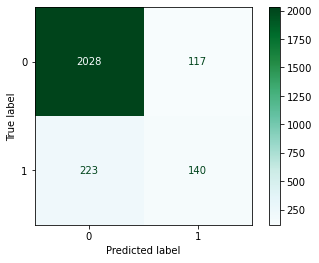

In [69]:
preds_retweets = gs_retweets.predict(X_test)
plot_confusion_matrix(gs_retweets, X_test, y_test1, cmap='BuGn');

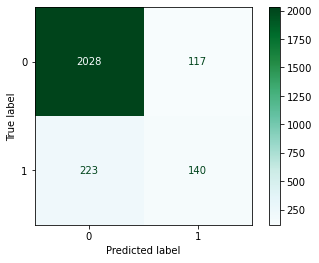

In [70]:
preds_replies = gs_replies.predict(X_test)
plot_confusion_matrix(gs_replies, X_test, y_test2, cmap='BuGn');

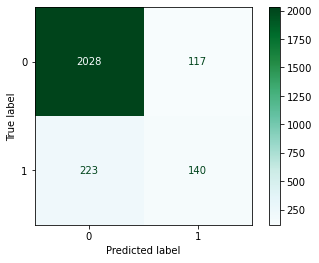

In [71]:
preds_likes = gs_likes.predict(X_test)
plot_confusion_matrix(gs_likes, X_test, y_test3, cmap='BuGn');

In [72]:
X_train_df.head()

,00,00 10aac3a,00 pic,00 pic twitter,000,000 000,000 000 year,000 000th,000 000th car,000 24,000 24 hours,000 caps,000 caps https,000 deaths,000 deaths tesla,000 hats,000 hats sold,000 horsepower,000 horsepower engine,000 km,000 km apogee,000 km earth,000 km falcon,000 lb,000 lb 15,000 lb towing,000 lbs,000 lbs muck,000 lbs puny,000 left,000 miles,000 miles black,000 mph,000 mph like,000 ordered,000 ordered 19,000 people,000 people died,000 people directly,000 people indirectly,000 people massive,000 people worst,000 pic,000 pic twitter,000 projects,000 projects underway,000 psi,000 road,000 road legal,000 shaft,000 shaft horsepower,000 tesla,000 tesla cars,000 tesla smart,000 tons,000 tons year,000 year,000 year age,000 year generous,0007,0007 988648,0007 988648 covid,000th,000th car,000th car pic,01,01 27,01 27 text,01 31,01 31 automakers,01 artificial,01 artificial intelligence,01 coming,01 coming soon,01 expensive,01 expensive build,01 fashion,01 fashion elon,01 secs,01 secs traction,01 weeks,01 weeks dec,0130,0130 c6ee,0130 c6ee 723c91aeae46,02,02 04,02 04 sure,02 10,02 10 tesla,02 11,02 11 consumer,02 20,02 20 tesla,02 27,02 27 bridgewater,02 27 spacex,02 ai,02 ai god,02 autos,02 autos tesla,02 elon,02 elon musk,02 spacex,02 spacex fly,02 tesla,02 tesla earnings,0202,0202 story,0202 story html,02b2ooly,03,03 18,03 18 opinion,03 18 tesla,03 25,03 25 car,03 tesla,03 tesla model,0387955011,0387955011 http,0387955011 http io9,04,04 05,04 05 feds,04 11,04 11 tesla,04 12,04 13,04 13 ftag,04 14,04 14 mystery,04 20,04 20 ford,04 22,04 22 10,04 25,04 25 tesla,04 28,04 28 texas,04 consumer,04 consumer reports,04 elon,04 elon musk,04 iss,04 iss recommends,04 little,04 little government,04 short,04 short new,04 sure,04 sure looks,04 trust,04 trust computer,04727546592196,04727546592196 2c,04727546592196 2c 72,05,05 01,05 01 fashion,05 02,05 02 tesla,05 05,05 05 warren,05 06,05 06 love,05 12,05 12 18d2e740,05 18,05 18 video,05 21,05 21 fact,05 22,05 22 elon,05 23,05 23 movies,05 30,05 30 fact,05 31,05 31 elon,05 feds,05 feds raided,05 fermi,05 fermi paradox,05 india,05 india electric,05 warren,05 warren buffett,0525558616,06,06 04,06 04 elon,06 04 little,06 08,06 08 politics,06 13,06 13 tesla,06 18,06 18 tesla,06 20,06 20 science,06 22,06 22 tesla,06 29,06 29 tesla,06 fortune,06 fortune elon,06 gates,06 gates says,06 health,06 health oumuamua,06 jay,06 jay leno,06 love,06 love tesla,0606,0606 4278,0606 4278 b454,07,07 06,07 06 fortune,07 06 gates,07 07,07 07 tesla,07 10,07 10 german,07 11,07 11 tesla,07 14,07 14 european,07 28,07 28 elon,07 fossil,07 fossil fuel,07 spacex,07 spacex steamroller,07 tesla,07 tesla model,07pm8zy0xji,08,08 06,08 06 jay,08 22,08 22 tesla,08 diff,08 diff 1st,08 politics,08 politics elon,08 spacex,08 spacex colonize,09,09 09,09 09 simple,09 15,09 15 tesla,09 23,09 23 investors,09 simple,09 simple statistic,0aji,0di88eoz2c,0f0733ad841e,0f0733ad841e html,0lkwipnopb,0ujwqqpwmsy,0ujwqqpwmsy feature,0ujwqqpwmsy feature youtu,0wopde7oe1k,10,10 000,10 000 year,10 02,10 02 ai,10 02 autos,10 03,10 03 tesla,10 14,10 14 days,10 17,10 17 775,10 20,10 20 deep,10 20 overly,10 200k,10 200k angel,10 21,10 21 pge,10 article,10 article says,10 bigger,10 bigger model,10 case,10 case ch4,10 cents,10 cents brick,10 covid,10 covid 19,10 fail,10 fail redundancy,10 followers,10 followers like,10 ft,10 ft nozzle,10 ft ok,10 german,10 german beta,10 guess,10 guess post,10 hat,10 hat aficionados,10 help,10 help affected,10 higher,10 higher chance,10 higher falcon,10 hours,10 imo,10 imo good,10 impressive,10 impressive 20,10 iridium,10 iridium satellites,10 just,10 just played,10 kg,10 kink,10 kink elon,10 km,10 km 7mph,10 kn,10 kn thrust,10 latest,10 max,10 max 39,10 million,10 million minute,10 million tons,10 mins,10 orbit,10 orbit synch,10 percent,10 percent half,10 performance,10 performance penalty,10 picks,10 picks 2015,10 runs,10 runs parallel,10 satellites,10 satellites iridium,10 sec,10 sec mile,10 secs,10 secs open,10 slight

In [73]:
tweet_cv_df.shape

(9286, 113414)

In [74]:
sent_df = pd.concat([tweet_cv_df, tweets_sentiment.drop(columns=['tweet'])], axis=1)
sent_df.head()

,00,00 10aac3a,00 pic,00 pic twitter,000,000 000,000 000 year,000 000th,000 000th car,000 24,000 24 hours,000 caps,000 caps https,000 deaths,000 deaths tesla,000 hats,000 hats sold,000 horsepower,000 horsepower engine,000 jobs,000 jobs people,000 km,000 km 30,000 km apogee,000 km decent,000 km earth,000 km falcon,000 lb,000 lb 15,000 lb towing,000 lbs,000 lbs muck,000 lbs puny,000 left,000 miles,000 miles black,000 model,000 model cars,000 mph,000 mph like,000 ordered,000 ordered 19,000 people,000 people died,000 people directly,000 people hour,000 people indirectly,000 people massive,000 people worst,000 pic,000 pic twitter,000 projects,000 projects underway,000 psi,000 road,000 road legal,000 shaft,000 shaft horsepower,000 tesla,000 tesla cars,000 tesla smart,000 tons,000 tons thrust,000 tons year,000 year,000 year age,000 year generous,0007,0007 988648,0007 988648 covid,000th,000th car,000th car pic,01,01 07,01 07 electric,01 27,01 27 text,01 31,01 31 automakers,01 artificial,01 artificial intelligence,01 coming,01 coming soon,01 expensive,01 expensive build,01 fashion,01 fashion elon,01 secs,01 secs traction,01 weeks,01 weeks dec,0130,0130 c6ee,0130 c6ee 723c91aeae46,02,02 04,02 04 sure,02 10,02 10 tesla,02 11,02 11 consumer,02 20,02 20 tesla,02 27,02 27 bridgewater,02 27 spacex,02 ai,02 ai god,02 asia,02 asia china,02 autos,02 autos tesla,02 elon,02 elon musk,02 global,02 global vehicle,02 spacex,02 spacex fly,02 tesla,02 tesla earnings,0202,0202 story,0202 story html,02b2ooly,03,03 18,03 18 opinion,03 18 tesla,03 18 world,03 25,03 25 car,03 climate,03 climate change,03 dragon,03 dragon russian,03 tesla,03 tesla model,0387955011,0387955011 http,0387955011 http io9,03m,03m 100,03m 100 ms,04,04 05,04 05 feds,04 11,04 11 tesla,04 12,04 13,04 13 ftag,04 14,04 14 mystery,04 15,04 15 ventilators,04 20,04 20 ford,04 22,04 22 10,04 24,04 24 fact,04 25,04 25 tesla,04 28,04 28 texas,04 consumer,04 consumer reports,04 elon,04 elon musk,04 iss,04 iss recommends,04 little,04 little government,04 neuralink,04 neuralink html,04 short,04 short new,04 sure,04 sure looks,04 trust,04 trust computer,04727546592196,04727546592196 2c,04727546592196 2c 72,05,05 01,05 01 fashion,05 02,05 02 tesla,05 05,05 05 warren,05 06,05 06 love,05 12,05 12 18d2e740,05 18,05 18 video,05 21,05 21 fact,05 22,05 22 elon,05 23,05 23 movies,05 25,05 25 opinion,05 30,05 30 fact,05 31,05 31 elon,05 feds,05 feds raided,05 fermi,05 fermi paradox,05 india,05 india electric,05 south,05 south australias,05 warren,05 warren buffett,0525558616,06,06 04,06 04 elon,06 04 little,06 08,06 08 politics,06 12,06 12 opinion,06 13,06 13 tesla,06 18,06 18 tesla,06 20,06 20 science,06 22,06 22 6c2f7982,06 22 tesla,06 26,06 26 week,06 29,06 29 tesla,06 29 worlds,06 fortune,06 fortune elon,06 gates,06 gates says,06 health,06 health oumuamua,06 jay,06 jay leno,06 love,06 love tesla,0606,0606 4278,0606 4278 b454,07,07 02,07 02 asia,07 06,07 06 fortune,07 06 gates,07 07,07 07 tesla,07 10,07 10 german,07 11,07 11 tesla,07 14,07 14 european,07 28,07 28 elon,07 31,07 31 driving,07 electric,07 electric vehicles,07 fossil,07 fossil fuel,07 spacex,07 spacex steamroller,07 tesla,07 tesla model,075,075 remained,075 remained placed,07pm8zy0xji,08,08 06,08 06 jay,08 22,08 22 tesla,08 diff,08 diff 1st,08 politics,08 politics elon,08 spacex,08 spacex colonize,08 tesla,08 tesla model,09,09 09,09 09 simple,09 13,09 13 tesla,09 15,09 15 tesla,09 23,09 23 investors,09 drove,09 drove gm,09 simple,09 simple statistic,0aji,0di88eoz2c,0f0733ad841e,0f0733ad841e html,0lkwipnopb,0q,0qo78r_yyfa,0ujwqqpwmsy,0ujwqqpwmsy feature,0ujwqqpwmsy feature youtu,0vg4wnuwvze6pbojdtq99k,0vg4wnuwvze6pbojdtq99k si,0vg4wnuwvze6pbojdtq99k si zfnoubq9qrca4yv2tlirsg,0wopde7oe1k,10,10 000,10 000 km,10 000 year,10 02,10 02 ai,10 02 autos,10 03,10 03 tesla,10 1089,10 1089 ast,10 1089 space,10 14,10 14 days,10 15,10 15 mins,10 17,10 17 775,10 17 watch,10 20,10 20 deep,10 20 overly,10 20 years,10 200k,10 200k angel,10 21,10 21 pge,10 2

In [75]:
sent_df.shape

(9286, 113424)

## Let's finish off with some LogiststicRegression!

In [76]:
X = sent_df.drop(columns=(['retweets_count', 'likes_count', 'replies_count', 'retweets_success', 'replies_success', 'likes_success']))
y1 = sent_df['retweets_success']
y2 = sent_df['replies_success']
y3 = sent_df['likes_success']

In [77]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1,
                                                    random_state=42,
                                                    test_size=.27)

In [78]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2,
                                                    random_state=42,
                                                    test_size=.27)

In [79]:
X_train, X_test, y_train3, y_test3 = train_test_split(X, y3,
                                                    random_state=42,
                                                    test_size=.27)

In [81]:
lr = LogisticRegression()
lr.fit(X_train, y_train1)

LogisticRegression()

In [84]:
lr.score(X_test, y_test1), lr.score(X_test, y_test2), lr.score(X_test, y_test3)

(0.8740031897926634, 0.8740031897926634, 0.8740031897926634)